# Projeto: Análise de Pacientes
<hr>

#### Respondendo a perguntas de negócio com base na exploração e análise dos dados<br>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df_patients_original = pd.read_csv("KaggleV2-May-2016.csv")

> #### Iniciando exploração do dataset

In [3]:
df_patients_original.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df_patients_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df_patients_original.shape

(110527, 14)

In [6]:
df_patients_original.isna().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


> #### Respondendo às perguntas

### Pergunta 1:
Qual é a proporção aproximada de pacientes que compareceram à consulta?

In [7]:
no_show_patients = df_patients_original[(df_patients_original['No-show'] == 'No')]
calc_percent_no_show_patients = (no_show_patients['No-show'].count()/df_patients_original['No-show'].count()) * 100
print(round(calc_percent_no_show_patients, 0))

80.0


### Pergunta 2:
Quantas instâncias e atributos existem no dataset, respectivamente?

In [8]:
ins_atr = df_patients_original.shape
print(f'Dataset: {ins_atr}')

Dataset: (110527, 14)


### Pergunta 3:
Qual das colunas do dataset possui valores nulos?

In [9]:
df_null_value = df_patients_original.isna().sum()
df_null_value

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


### Pergunta 4:
Qual é a idade média dos pacientes?

In [10]:
patients_mean_age = df_patients_original['Age'].mean()
print(round(patients_mean_age, 0))

37.0


### Pergunta 5:
Em quantas localidades diferentes (Neighbourhood) os pacientes residem?

In [11]:
patient_sites = df_patients_original['Neighbourhood'].nunique()
patient_sites

81

### Pergunta 6:
Quantas variáveis binárias (apenas dois valores) existem no dataset?

In [12]:
for colunas in list(df_patients_original.columns):
  print(colunas, df_patients_original[colunas].nunique())

PatientId 62299
AppointmentID 110527
Gender 2
ScheduledDay 103549
AppointmentDay 27
Age 104
Neighbourhood 81
Scholarship 2
Hipertension 2
Diabetes 2
Alcoholism 2
Handcap 5
SMS_received 2
No-show 2


### Pergunta 7:
Quantos valores diferentes encontramos para a variável dos SMS recebidos (SMS_received)?

In [13]:
unique_sms = df_patients_original['SMS_received'].nunique()
unique_sms

2

### Pergunta 8:
Qual é a menor e maior idade, respectivamente, presente no dataset?

In [14]:
min_age = df_patients_original['Age'].min()
min_age

-1

necessário filtrar a coluna Age para encontrar idade real

In [15]:
min_age = df_patients_original[(df_patients_original['Age'] >= 0)].min()
max_age = df_patients_original['Age'].max()
print(min_age['Age'],max_age)

0 115


### Pergunta 9:
Qual é a proporção de pacientes que receberam o SMS e NÃO compareceram?

In [16]:
calc_sms_no_show = df_patients_original[(df_patients_original['SMS_received'] == 1) & (df_patients_original['No-show'] == 'No')]
calc_sms_no_show_percent = (calc_sms_no_show['No-show'].count() / df_patients_original['No-show'].count()) * 100
print(round(calc_sms_no_show_percent,0))

23.0


### Pergunta 10:
Qual região possui o maior número de consultas marcadas?


<ipython-input-17-9ffe44a7f10f>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)


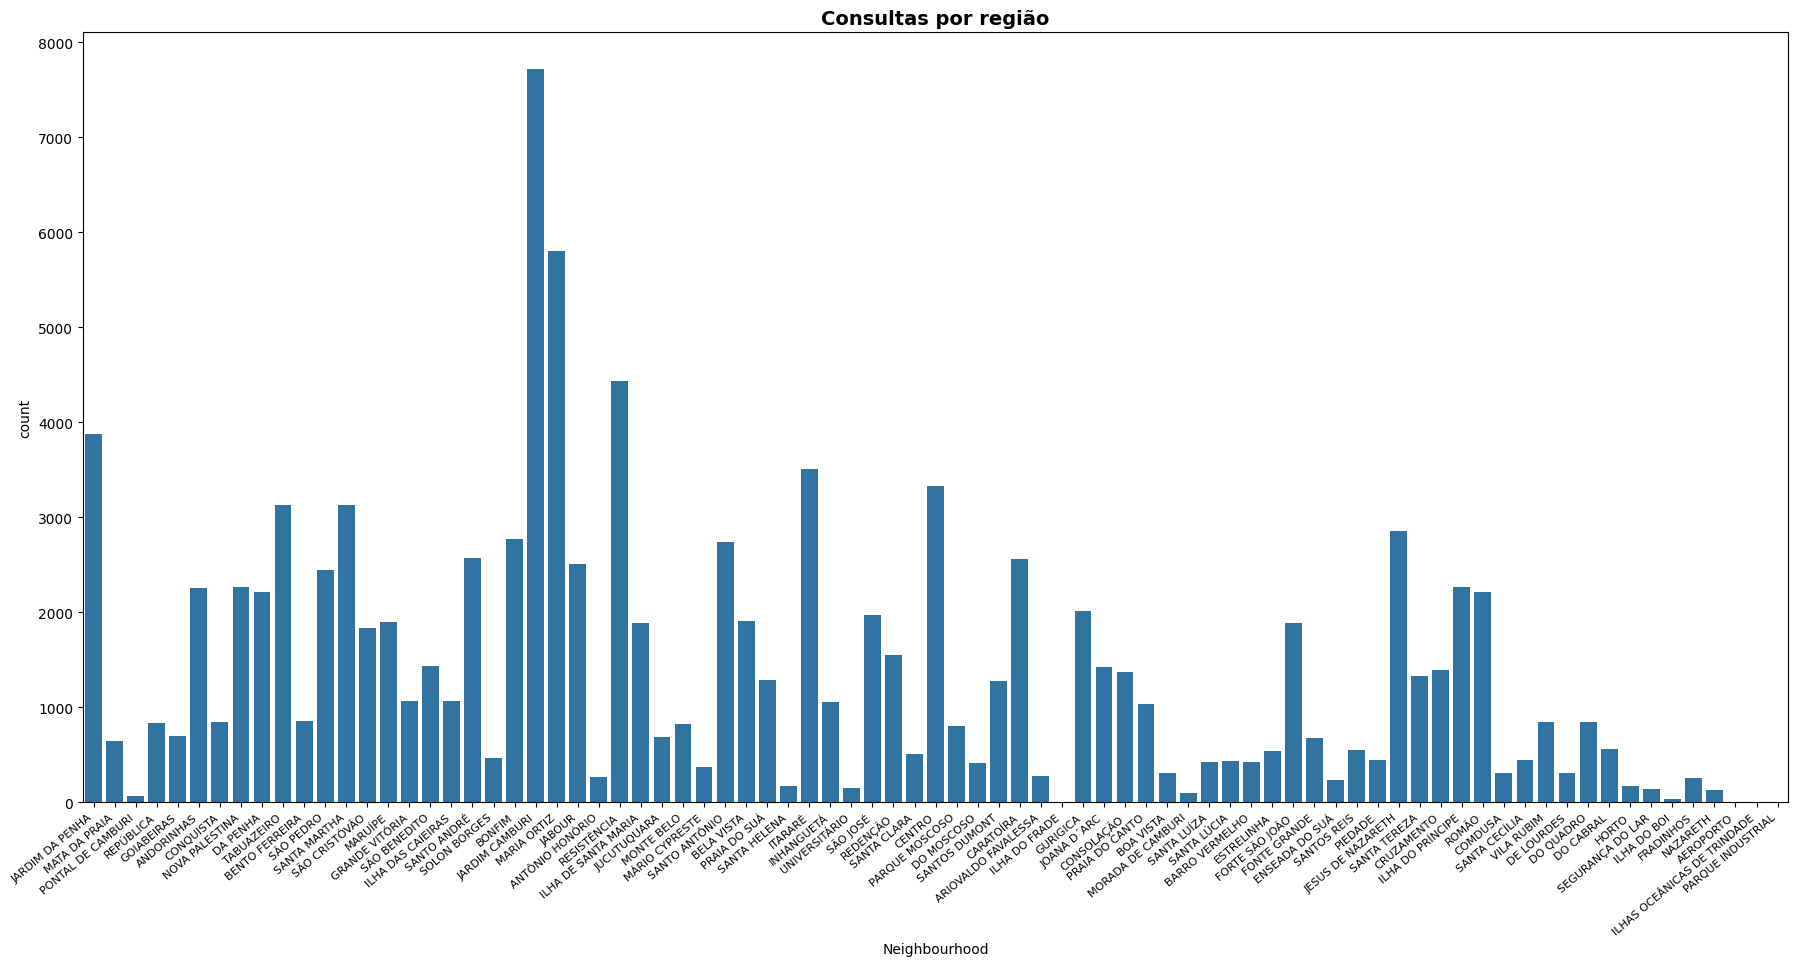

In [17]:
regioes = df_patients_original['Neighbourhood'].unique()
plt.figure(figsize=(22,10))
ax = sns.countplot(x='Neighbourhood', data=df_patients_original, order=regioes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Consultas por região', fontsize=14, fontweight='bold')
plt.show()